<a href="https://colab.research.google.com/github/LRLeite/Data-Analytics/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Importar dataset diretamente do Github</h2> 
Informações sobre o dataset: https://github.com/owid/covid-19-data/tree/master/public/data

Obs: sistema de separação de milhar e decimal em inglês

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Base de dados
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
#Data do primeiro e último registro
print(f'Primeiro registro: {df.date.min()}')
print(f'Última atualização: {df.date.max()}')


Primeiro registro: 2020-01-01
Última atualização: 2022-11-10


<h2>Selecionar colunas de interesse</h2>

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
columns_final = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'total_tests', 
                 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','total_vaccinations_per_hundred', 
                 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'population']

df.drop(columns=df.columns.difference(columns_final), inplace = True)

df.head()

,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
1,Asia,Afghanistan,2020-02-25,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
2,Asia,Afghanistan,2020-02-26,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
3,Asia,Afghanistan,2020-02-27,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
4,Asia,Afghanistan,2020-02-28,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0


## **Tratar dados**

In [6]:
#Substituir valores NaN por zero
df.fillna(df[['total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'total_tests', 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 
              'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'population']].fillna(0), inplace = True)

df.head()

,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0


In [7]:
#Converter float para int
df[['total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population']] = df[['total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 
                                                                                                                                             'people_vaccinated', 'people_fully_vaccinated', 'population']].astype(int)

In [8]:
df.head()

,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772
1,Asia,Afghanistan,2020-02-25,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772
2,Asia,Afghanistan,2020-02-26,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772
3,Asia,Afghanistan,2020-02-27,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772
4,Asia,Afghanistan,2020-02-28,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234041 entries, 0 to 234040
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   continent                            220835 non-null  object 
 1   location                             234041 non-null  object 
 2   date                                 234041 non-null  object 
 3   total_cases                          234041 non-null  int64  
 4   total_deaths                         234041 non-null  int64  
 5   total_cases_per_million              234041 non-null  float64
 6   total_deaths_per_million             234041 non-null  float64
 7   total_tests                          234041 non-null  int64  
 8   total_tests_per_thousand             234041 non-null  float64
 9   total_vaccinations                   234041 non-null  int64  
 10  people_vaccinated                    234041 non-null  int64  
 11  people_fully_



---


# **Análises**


---



# **Número de casos, mortes e relação caso-fatalidade por continente**


In [37]:
#Selecionar os dados de interesse para analisar os números por continente
df_continents = df[['location','total_cases', 'total_deaths', 'total_vaccinations']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]
df_continents = df_continents.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].max().sort_values(by = 'location')

In [38]:
#Converter o índice 'location' em coluna para análise posteriores
df_continents['continent'] = df_continents.index
df_continents[['total_cases', 'total_deaths', 'total_vaccinations']] = df_continents[['total_cases', 'total_deaths', 'total_vaccinations']]
df_continents.reset_index(drop  =True, inplace = True)
df_continents = df_continents[['continent', 'total_cases', 'total_deaths', 'total_vaccinations']] #reoordenar as colunas

In [68]:
#Calcular a relação caso-fatalidade
df_continents['case_fatality_ratio'] = round((df_continents['total_deaths']/df_continents['total_cases']) * 100, 2)
df_continents

,continent,total_cases,total_deaths,total_vaccinations,case_fatality_ratio
0,Africa,12397829,257061,680597842,2.07
1,Asia,191052410,1496553,8789420824,0.78
2,Europe,237495019,1969295,1345947576,0.83
3,North America,116057443,1530481,1102593930,1.32
4,Oceania,12723636,20795,80370119,0.16
5,South America,64436594,1333345,929778862,2.07


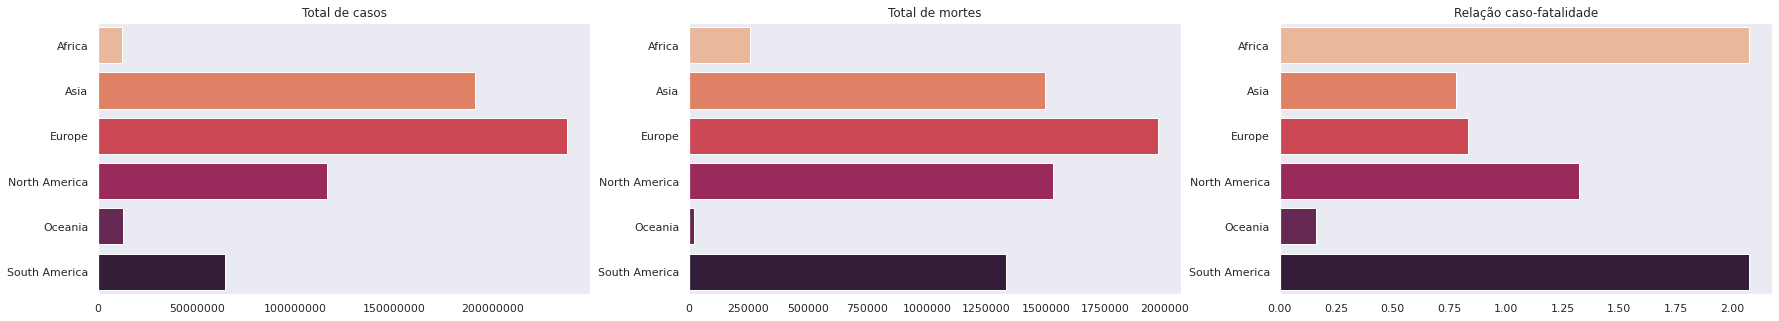

In [70]:
#Gráfico
sns.set_theme(style = "dark")
fig, ax = plt.subplots(1, 3, figsize = (30,5))

ax[0].set_title('Total de casos')
ax[0].ticklabel_format(style='plain') #remover notação científica

ax[1].set_title('Total de mortes')
ax[1].ticklabel_format(style='plain') #remover notação científica
ax[2].set_title('Relação caso-fatalidade')
ax[2].ticklabel_format(style='plain') #remover notação científica

ax[0] = sns.barplot(data = df_continents, x = df_continents['total_cases'], y = df_continents['continent'], palette = "rocket_r", ci = None, order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

ax[1] = sns.barplot(data = df_continents, x = df_continents['total_deaths'], y = df_continents['continent'], palette = "rocket_r", ci = None, order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

ax[2] = sns.barplot(data = df_continents, x = df_continents['case_fatality_ratio'], y = df_continents['continent'], palette = "rocket_r", ci = None, order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[2])
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)

plt.show()

In [36]:
df_continents.applymap(lambda x: "{:,}".format(x))

,total_cases,total_deaths,total_vaccinations
location,,,
Africa,"12,397,829","257,061","680,597,842"
Asia,"191,052,410","1,496,553","8,789,420,824"
Europe,"237,495,019","1,969,295","1,345,947,576"
North America,"116,057,443","1,530,481","1,102,593,930"
Oceania,"12,723,636","20,795","80,370,119"
South America,"64,436,594","1,333,345","929,778,862"


# **Ranking com os 10 países que apresentaram mais mortes por covid-19, em termos absolutos e relativos**

<h3>Encontrar o número de mortes por país, em termos absolutos</h3>

In [47]:
df.groupby('location')['total_deaths'].max().sort_values(ascending = False).head(10)

location
World                  6607545
High income            2719942
Upper middle income    2499808
Europe                 1969295
North America          1530481
Asia                   1496553
Lower middle income    1340017
South America          1333345
European Union         1166664
United States          1074485
Name: total_deaths, dtype: int64

<h3>É necessário remover valores que não pertencem a um único país</h3>

In [44]:
#Remover valores que não pertencem a um único país e visualizar o ranking
df_ranking = df.loc[df.location.isin(['High income', 'Asia', 'Upper middle income', 'Europe', 'Africa', 'North America', 'Lower middle income', 'South America', 'European Union','Oceania', 'Low income', 'International', 'Micronesia (country)']) == False] 
deaths_vAbsolute = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['total_deaths'].max().sort_values(ascending = False).head(10).map('{:0,.0f}'.format)
deaths_vAbsolute = pd.DataFrame(deaths_vAbsolute)
deaths_vAbsolute

,total_deaths
location,
United States,"1,074,485"
Brazil,"688,607"
India,"530,520"
Russia,"382,949"
Mexico,"330,430"
Peru,"217,146"
United Kingdom,"210,680"
Italy,"179,436"
Indonesia,"158,989"


<h3>Encontrar os 10 países que tiveram os maiores percentuais de mortes por covid-19 no mundo</h3>


In [48]:
#Selecionar valores para realizar o cálculo do valor percentual do total de mortes
world = df_ranking[['location', 'total_deaths']].loc[df_ranking.location == 'World'].max()

countries = df_ranking[['location', 'total_deaths']].loc[df_ranking.location != 'World'].groupby('location').max()

In [49]:
#Visualizar o ranking
percent_deaths = (countries.total_deaths/world.total_deaths).sort_values(ascending = False).head(10)
percent_deaths = pd.DataFrame(percent_deaths).rename(columns = {'total_deaths': '%total_deaths'})
percent_deaths["rank_total_deaths"] = percent_deaths['%total_deaths'].rank(ascending = False).map('{:0,.0f}'.format)
percent_deaths["%total_deaths"] = percent_deaths['%total_deaths'].map('{:0,.2%}'.format)
percent_deaths

,%total_deaths,rank_total_deaths
location,,
United States,16.26%,1
Brazil,10.42%,2
India,8.03%,3
Russia,5.80%,4
Mexico,5.00%,5
Peru,3.29%,6
United Kingdom,3.19%,7
Italy,2.72%,8
Indonesia,2.41%,9


<h3>Ranquear os países mais populosos do mundo</h3>


In [50]:
rank_population = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['population'].max().sort_values(ascending = False)
rank_population = pd.DataFrame(rank_population)
rank_population["population_rank"] = rank_population['population'].rank(ascending = False).map('{:0,.0f}'.format)
rank_population['population'] = rank_population['population'].map('{:0,.0f}'.format)
rank_population.head(10)

,population,population_rank
location,,
China,"1,425,887,360",1
India,"1,417,173,120",2
United States,"338,289,856",3
Indonesia,"275,501,344",4
Pakistan,"235,824,864",5
Nigeria,"218,541,216",6
Brazil,"215,313,504",7
Bangladesh,"171,186,368",8
Russia,"144,713,312",9


<h2>Tabela final</h2>

In [51]:
deaths_vAbsolute.merge(percent_deaths, on = 'location').merge(rank_population['population_rank'], on = 'location')

,total_deaths,%total_deaths,rank_total_deaths,population_rank
location,,,,
United States,"1,074,485",16.26%,1,3
Brazil,"688,607",10.42%,2,7
India,"530,520",8.03%,3,2
Russia,"382,949",5.80%,4,9
Mexico,"330,430",5.00%,5,10
Peru,"217,146",3.29%,6,45
United Kingdom,"210,680",3.19%,7,22
Italy,"179,436",2.72%,8,25
Indonesia,"158,989",2.41%,9,4


## Ranking com os 10 países que apresentaram mais mortes por covid-19 a cada  milhão de habitantes

Obs: sistema de separação de milhar em inglês

In [52]:
deaths_per_million = df_ranking.groupby('location')['total_deaths_per_million'].max().sort_values(ascending = False).head(10).map('{:0,.0f}'.format)
deaths_per_million = pd.DataFrame(deaths_per_million)
deaths_per_million

,total_deaths_per_million
location,
Peru,"6,377"
Bulgaria,"5,594"
Bosnia and Herzegovina,"5,005"
Hungary,"4,827"
North Macedonia,"4,568"
Georgia,"4,517"
Montenegro,"4,446"
Croatia,"4,271"
Czechia,"3,974"


## **Números da vacinação**

<h3>Números da vacinação por continente</h3>

In [53]:
data_vaccination = df[['location','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                       'people_fully_vaccinated_per_hundred']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]

df_vaccination = data_vaccination.groupby('location')[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
                                                       'people_fully_vaccinated_per_hundred']].max().sort_values(by = 'location').applymap(lambda x: "{:,}".format(x))
df_vaccination

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
location,,,,,,
Africa,"680,597,842","441,604,947","354,299,430",47.7,30.95,24.83
Asia,"8,789,420,824","3,624,746,269","3,398,887,473",186.16,76.77,71.99
Europe,"1,345,947,576","519,926,416","497,038,901",180.71,69.81,66.73
North America,"1,102,593,930","452,859,423","390,074,356",183.67,75.44,64.98
Oceania,"80,370,119","29,103,226","27,980,344",178.45,64.62,62.12
South America,"929,778,862","372,159,673","334,617,672",212.85,85.2,76.6


<h3>Ranking com os 10 países que tiveram o maior número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [65]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

location
Gibraltar               126.76
Qatar                   105.68
United Arab Emirates    103.72
Pitcairn                100.00
Brunei                   99.26
Singapore                90.90
Chile                    90.23
Hong Kong                90.07
China                    89.22
Cuba                     89.18
Name: people_fully_vaccinated_per_hundred, dtype: float64

<h3>Ranking com os 10 países que tiveram o menor número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [61]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = True).head(15)

location
Marshall Islands                0.00
Eritrea                         0.00
Western Sahara                  0.00
Guam                            0.00
Vatican                         0.00
United States Virgin Islands    0.00
Northern Mariana Islands        0.00
North Korea                     0.00
Palau                           0.00
Saint Pierre and Miquelon       0.00
Puerto Rico                     0.00
Burundi                         0.18
Yemen                           2.01
Haiti                           2.04
Papua New Guinea                2.94
Name: people_fully_vaccinated_per_hundred, dtype: float64

Alguns países acima não possuem ou não divulgaram os dados da vacinação. Dessa forma, optei por remover esses registros para essa análise.

In [64]:
#Dropar países que não forneceram dados, que são regidos por outros países ou que tiveram apuração atrelada a outros países
people_fully_vaccinated_per_hundred = df_ranking.loc[df_ranking.location.isin(['United States Virgin Islands', 'Saint Pierre and Miquelon', 'Puerto Rico', 'Western Sahara', 'Guam',
                                                                               'Northern Mariana Islands', 'Marshall Islands', 'Eritrea', 'Vatican', 'North Korea', 'Palau']) == False] 
                                                                               
#Ranking final
people_fully_vaccinated_per_hundred.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = True).head(10)

location
Burundi                         0.18
Yemen                           2.01
Haiti                           2.04
Papua New Guinea                2.94
Democratic Republic of Congo    3.76
Cameroon                        4.61
Madagascar                      5.91
Senegal                         7.29
Syria                           9.51
Mali                            9.56
Name: people_fully_vaccinated_per_hundred, dtype: float64